In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Position_Salaries.csv')
feature = data.iloc[:,1:-1].to_numpy()
label = data.iloc[:,-1].to_numpy()
feature

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [3]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(
    feature,
    label,
    test_size=0.2,
    random_state=0
)
feature_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [4]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(feature_train,label_train)

LinearRegression()

In [5]:
feature_test

array([[3],
       [9]], dtype=int64)

In [6]:
predict_label = linear_model.predict(feature_test)
np.concatenate(
    (np.reshape(predict_label,newshape=(len(predict_label),1)),
     np.reshape(label_test,newshape=(len(label_test),1))),
    axis=1
)

array([[ 44275.9295499 ,  60000.        ],
       [543473.58121331, 500000.        ]])

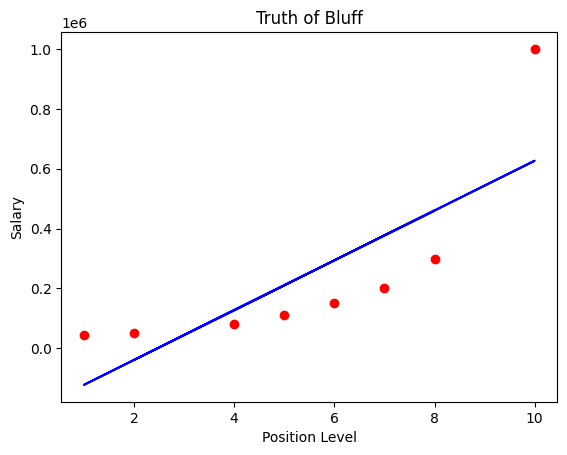

In [7]:
plt.scatter(feature_train,label_train,color='red')
plt.plot(
    feature_train,linear_model.predict(feature_train),color='blue'
)
plt.title("Truth of Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=6)
feature_train_poly = poly_model.fit_transform(feature_train)

polyno_model = LinearRegression()
polyno_model.fit(feature_train_poly,label_train)
feature_train_poly

array([[1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04,
        1.00000e+05, 1.00000e+06],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04]])

In [9]:
predict_label = polyno_model.predict(poly_model.fit_transform(feature_test))
np.concatenate(
    (np.reshape(predict_label,newshape=(len(predict_label),1)),
     np.reshape(label_test,newshape=(len(label_test),1))),
    axis=1
)

array([[ 58388.76570901,  60000.        ],
       [521400.59127287, 500000.        ]])

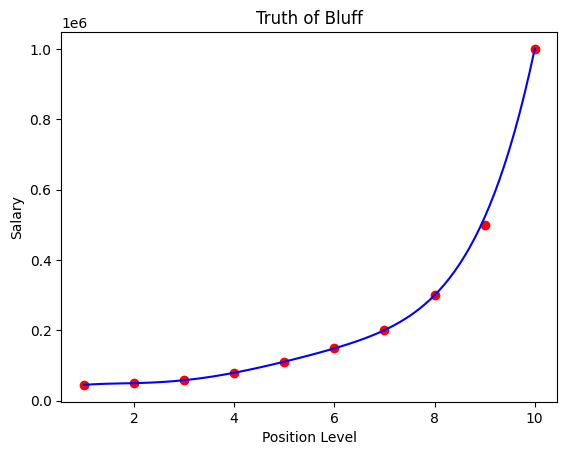

In [10]:
x_grid = np.arange(np.min(feature),np.max(feature)+0.1,0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(feature,label,color='red')
plt.plot(
    x_grid,polyno_model.predict(poly_model.fit_transform(x_grid)),color='blue'
)
plt.title("Truth of Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [11]:
linear_model.predict([[6.5]])

array([335474.55968689])

In [12]:
polyno_model.predict(poly_model.fit_transform([[6.5]]))

array([171719.26475803])